# Support Vector Machine
### Optimization question for solving weight vector
\begin{equation*}
minimize\;\;\;f(\mathbf{w}) = \frac{1}{2} ||\mathbf{w}||^2 \\
subject \: to\;\;\;g_i(w_i, b) = y_i(w_i \mathbf{x}_i + b) - 1 \geq 0
\end{equation*}
### which can be transformed as a dual problem of lagrange formulation - wolfe dual problem
\begin{equation*}
L(\mathbf{w}, b, \lambda) = \frac{1}{2} ||\mathbf{w}||^2 - \sum_{i=1}^{m}\lambda_i[y_i(w_i \mathbf{x}_i + b) - 1]\\
\frac{\partial L(\mathbf{w}, b, \lambda)}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^m{\lambda_{i}y_{i}\mathbf{x_i}} =0 \\
\frac{\partial L(\mathbf{w}, b, \lambda)}{\partial b} = \sum_{i=1}^{m}{\lambda_{i}y_{i}} = 0\\
subject \: to\;\;\;\lambda_i \geq 0
\end{equation*}
### can be simplified as:
\begin{equation*}
minimize\;\;\;W(\lambda) = \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^m \lambda_i\lambda_{j}y_{i}y_{j}\mathbf{x}_{i}\mathbf{x}_{j} \\
subject \: to\;\;\;\lambda_i \geq 0 \;\; and \;
\sum_{i=1}^{m}{\lambda_{i}y_{i}} = 0\
\end{equation*}
### KKT condition of complementary slackness has not been addressed in wolfe dual problem:
\begin{equation*}
\lambda_{i}[y_i(w_i \mathbf{x}_i + b) - 1]=0\\
since: \: condition \: only \: based \: on \: support \: vectors\\
therefore: \;\;\; y_i(w_i \mathbf{x}_i + b) - 1 = 0 \\
\lambda_{i} > 0
\end{equation*}
### matrix form of simplified wolfe problem:
\begin{equation*}
minimize\;\;\;W(\lambda)=\frac{1}{2}\mathbf{\lambda}^{T}(\mathbf{y}\mathbf{y}^{T}\mathbf{K})\mathbf{\lambda} - \mathbf{\lambda}\\
subject\:to\;\;\;-\lambda \leq 0\;\;and\;\;\mathbf{y}\lambda=0 \\
\mathbf{K} = \begin{vmatrix}
\mathbf{x_1}\mathbf{x_1} & \mathbf{x_1}\mathbf{x_2} &...& \mathbf{x_1}\mathbf{x_m} \\
\mathbf{x_2}\mathbf{x_1} & \mathbf{x_2}\mathbf{x_2} &...& \mathbf{x_2}\mathbf{x_m} \\
... & ... & ... & ... \\
\mathbf{x_m}\mathbf{x_1} & \mathbf{x_m}\mathbf{x_2} &...& \mathbf{x_m}\mathbf{x_m} \\
\end{vmatrix}
\end{equation*}

In [71]:
import numpy as np


class svm:
    
    def __init__(self, X, y, verbose=False):
        self.X = X
        self.y = y
        self.verbose = verbose

        try:
            from cvxopt import matrix, solvers
            self._mtx = matrix
            self._qp  = solvers.qp
        except ImportError:
            raise ImportError("""
            The python module cvxopt is required to use
            quadratic programming functionality.
            Please use below command to safely install
            sudo conda install -c conda-forge cvxopt
            """)

        if not self.verbose:
            solvers.options['show_progress'] = False 
            
            
    def possible_inner_product(self, X):
        """
        find all possible inner products of a matrix and itself
        """
        
        m = X.shape[0]
        K = np.array([np.dot(X[i],X[j]) 
                      for i in range(m) 
                      for j in range(m)]).reshape((m,m))
        return K, m


    def wolfe_solver(self, X, y):
        """
        wolfe optimization problem is a dual form of lagrange,
        which is quadratic programming and solved by cvxopt
        """
        
        K, m = self.possible_inner_product(X)
        P = self._mtx(np.outer(y,y) * K, tc = 'd')
        q = self._mtx(-1 * np.ones(m))

        G = self._mtx(np.diag(-1 * np.ones(m)))
        h = self._mtx(np.zeros(m))

        A = self._mtx(y, size = (1,m), tc = 'd')
        b = self._mtx(0.0)

        solution = self._qp(P=P, q=q, G=G, h=h, A=A, b=b)
        
        return np.ravel(solution["x"])

    
    def find_support_vec(self):
        """
        find vector that has nonpositive lagrange multiplyers
        """
        
        multipliers = self.wolfe_solver(self.X, self.y)
        positive_pos = multipliers > 1e-7
        return self.X[positive_pos], self.y[positive_pos], multipliers[positive_pos]


    def direction(self, x):
        """
        function for calculation of directory vector
        direction vector is a unit vector with norm equals 1
        """
        
        return x / np.linalg.norm(x)

    
    def compute_weight(self):
        """
        compute weights and intercept based on only support vectors
        """
        
        X, y, multipliers = self.find_support_vec()
        w = np.dot(np.multiply(multipliers, y), X)
        b = np.dot(np.transpose(y), np.dot(X, w))
        return w, b
    


In [146]:
X=np.array([[1.5,2],[1,3],[1.4, 2.6],[2.5,2],[2,2.5]])
y=np.array([1,1,1,-1,-1])
a = svm(X, y)
w, b = a.compute_weight()

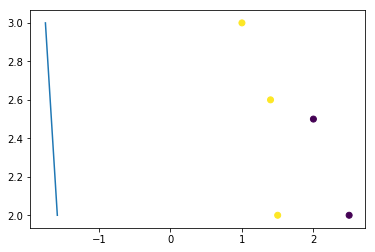

In [160]:
import matplotlib.pyplot as plt
X_unzip = list(zip(*X))
line_x2 = np.linspace(2, 3, 100)
line_x1 =  -(line_x2 * w[1] + b) / w[0]
#Z = np.sqrt()
plt.scatter(X_unzip[0],X_unzip[1], c = y*0.5)
plt.plot(line_x1, line_x2)
plt.show()

In [149]:
b

-4.285714339514611